In [79]:
import pandas as pd

In [110]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

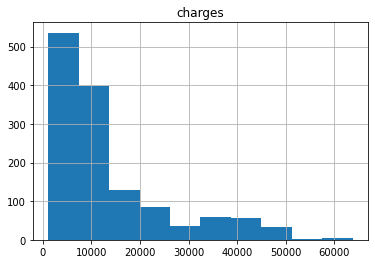

In [4]:
df.hist(column='charges')

C:\Users\anany\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

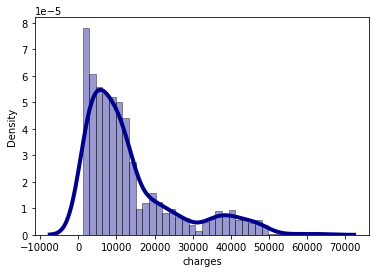

In [5]:
sns.distplot(df['charges'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

<AxesSubplot:title={'center':'charges'}, xlabel='region'>

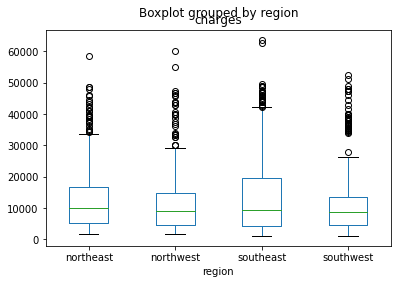

In [6]:
df.boxplot(by ='region', column =['charges'], grid = False)

<AxesSubplot:title={'center':'charges'}, xlabel='smoker'>

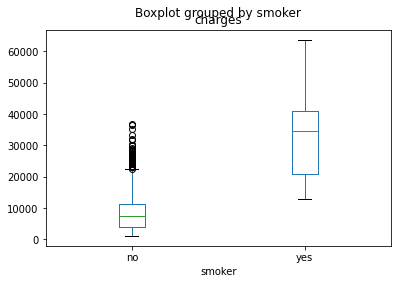

In [7]:
df.boxplot(by ='smoker', column =['charges'], grid = False)

<AxesSubplot:title={'center':'charges'}, xlabel='sex'>

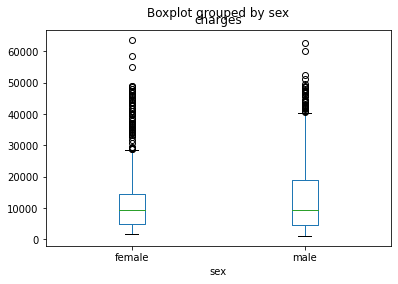

In [8]:
df.boxplot(by ='sex', column =['charges'], grid = False)

<AxesSubplot:title={'center':'charges'}, xlabel='children'>

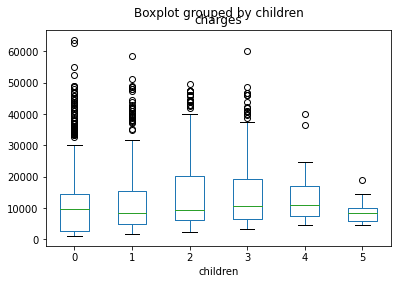

In [9]:
df.boxplot(by ='children', column =['charges'], grid = False)

In [10]:
df.corr()
corrMatrix = df.corr()
print (corrMatrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


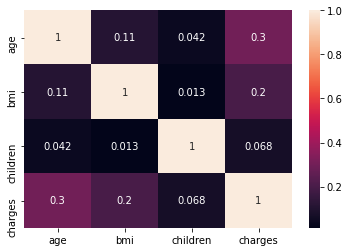

In [11]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [125]:
print(df['sex'].value_counts())

print("\n",df['smoker'].value_counts())

print("\n",df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64

 no     1064
yes     274
Name: smoker, dtype: int64

 southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [126]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
df['sex']= label_encoder.fit_transform(df['sex'])
df['smoker']= label_encoder.fit_transform(df['smoker'])
df['region']= label_encoder.fit_transform(df['region'])

In [129]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [128]:

print(df['sex'].value_counts())

print("\n",df['smoker'].value_counts())

print("\n",df['region'].value_counts())

1    676
0    662
Name: sex, dtype: int64

 0    1064
1     274
Name: smoker, dtype: int64

 2    364
1    325
3    325
0    324
Name: region, dtype: int64


In [131]:
#male=1
#female=0
#no=0
#yes=1
#southeast=2
#northeast=0
#northwest=1
#southwest=3

In [82]:
from sklearn.model_selection import train_test_split

X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = .30,random_state = 101)

In [83]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

In [84]:
r2=[]

In [85]:
from sklearn.metrics import r2_score
r2score=r2_score(y_test,pred)
print(r2score)
r2.append(r2score)

0.7501906928216026


In [86]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,pred)
print(mae)

4319.71000122883


In [87]:
mse = metrics.mean_squared_error(y_test,pred)
print(mse)

36366517.584897205


In [88]:
import math

rmse = math.sqrt(mse)

print(rmse)

6030.465785069774


In [104]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train,y_train)

pred = model.predict(X_test)


In [90]:
r2score=r2_score(y_test,pred)

print("R2 score is" ,r2score)


mae = metrics.mean_absolute_error(y_test,pred)

print("MAE is" ,mae)


mse = metrics.mean_squared_error(y_test,pred)

print("MSE is" ,mse)


rmse = math.sqrt(mse)

print("RMSE is" ,rmse)

r2.append(r2score)

R2 score is 0.6909178420233006
MAE is 3232.7903882540027
MSE is 44995288.04669622
RMSE is 6707.852715041992


In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50)

model.fit(X_train,y_train)

pred = model.predict(X_test)

In [92]:
r2score=r2_score(y_test,pred)

print("R2 score is" ,r2score)


mae = metrics.mean_absolute_error(y_test,pred)

print("MAE is" ,mae)


mse = metrics.mean_squared_error(y_test,pred)

print("MSE is" ,mse)


rmse = math.sqrt(mse)

print("RMSE is" ,rmse)
r2.append(r2score)

R2 score is 0.8251480930527075
MAE is 2947.6265868817927
MSE is 25454435.70767568
RMSE is 5045.238914826104


In [93]:
from  sklearn.svm import SVR
model = SVR(kernel='rbf')

model.fit(X_train,y_train)

pred = model.predict(X_test)

In [94]:
r2score=r2_score(y_test,pred)

print("R2 score is" ,r2score)


mae = metrics.mean_absolute_error(y_test,pred)

print("MAE is" ,mae)


mse = metrics.mean_squared_error(y_test,pred)

print("MSE is" ,mse)


rmse = math.sqrt(mse)

print("RMSE is" ,rmse)
r2.append(r2score)

R2 score is -0.10804857156398806
MAE is 8206.229243104739
MSE is 161306511.42603478
RMSE is 12700.650039507222


In [95]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(X_train,y_train)

pred = model.predict(X_test)

In [96]:
r2score=r2_score(y_test,pred)

print("R2 score is" ,r2score)


mae = metrics.mean_absolute_error(y_test,pred)

print("MAE is" ,mae)


mse = metrics.mean_squared_error(y_test,pred)

print("MSE is" ,mse)


rmse = math.sqrt(mse)

print("RMSE is" ,rmse)
r2.append(r2score)

R2 score is 0.04661788797190136
MAE is 8539.990480262328
MSE is 138790614.8646271
RMSE is 11780.942868235425


In [97]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()

model.fit(X_train,y_train)

pred = model.predict(X_test)

In [98]:
r2score=r2_score(y_test,pred)

print("R2 score is" ,r2score)


mae = metrics.mean_absolute_error(y_test,pred)

print("MAE is" ,mae)


mse = metrics.mean_squared_error(y_test,pred)

print("MSE is" ,mse)


rmse = math.sqrt(mse)

print("RMSE is" ,rmse)
r2.append(r2score)

R2 score is 0.8221665179184994
MAE is 3797.2654173347896
MSE is 25888484.806060314
RMSE is 5088.072798816887


In [ ]:
from sklearn.ensemble import BaggingRegressor
model=BaggingRegressor()

model.fit(X_train,y_train)

pred = model.predict(X_test)

In [102]:
r2score=r2_score(y_test,pred)

print("R2 score is" ,r2score)


mae = metrics.mean_absolute_error(y_test,pred)

print("MAE is" ,mae)


mse = metrics.mean_squared_error(y_test,pred)

print("MSE is" ,mse)


rmse = math.sqrt(mse)

print("RMSE is" ,rmse)
r2.append(r2score)

R2 score is 0.8221665179184994
MAE is 3797.2654173347896
MSE is 25888484.806060314
RMSE is 5088.072798816887


[0.7501906928216026, 0.6909178420233006, 0.8251480930527075, -0.10804857156398806, 0.04661788797190136, 0.8221665179184994, 0.8221665179184994]


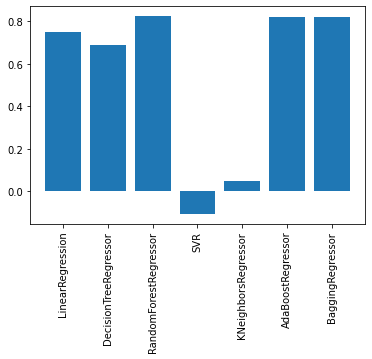

In [103]:
print(r2)
x=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','SVR','KNeighborsRegressor','AdaBoostRegressor','BaggingRegressor']
plt.bar(x, r2)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#male=1
#female=0
#no=0
#yes=1
#southeast=2
#northeast=0
#northwest=1
#southwest=3

In [135]:
model.predict([[19,1,27.900,0,1,2]])[0]#bagging


17468.9839

In [136]:
import joblib
joblib.dump(model,'predictions.pkl')

['predictions.pkl']

In [138]:
import pickle
pickle.dump(model, open('predictions.pkl','wb'))